<a href="https://colab.research.google.com/github/guptaShourya/SalesPrediction/blob/main/SalesPrediciton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np #linear algebra
import pandas as pd #data processing
import matplotlib.pyplot as plt #data visualisation
import seaborn as sns #data visualisation
from google.colab import drive #drive
drive.mount('/content/drive') #attach google drive
#!pip install dataprep 
#!pip install datawig
# import datawig # to impute missing values
sns.set()

Mounted at /content/drive


In [2]:
path = '/content/drive/My Drive/ML sem-5/Sales Prediction/data.csv'
# import data
data = pd.read_csv(path)

In [3]:
data.head(10) #display top 10 rows

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [4]:
# number of rows and columns in dataset
print("Data has {} rows, {} columns".format(data.shape[0], data.shape[1]))

Data has 200 rows, 4 columns


In [5]:
#number of nulls in dataset
print("Data has {} null values".format(data.isnull().any().sum()))

Data has 0 null values


In [6]:
# Statistical overview of data
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
# brief description of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


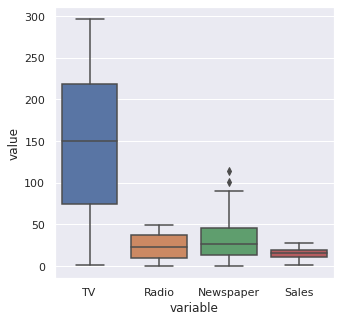

In [11]:
f, ax = plt.subplots(figsize = (5, 5)) # set size of the plot

sns.boxplot(x = "variable", y = "value", data = pd.melt(data), ax = ax) # use box plot to visualize outliers
plt.show() # display plot

In [12]:
def handleOutliers(data):
  Q1 = data.quantile(0.25) # calculate first quantile
  Q3 = data.quantile(0.75) # calculate third quantile
  IQR1 = Q3-Q1 # calculate inter quartile range

  data_c = data[~((data < (Q1-1.5*IQR1))|(data > (Q3+1.5*IQR1))).any(axis = 1)] # initialise data w/o outliers (drop outliers)

  print('Data loss is {}%'.format(((len(data) - len(data_c))/len(data))*100)) # report data loss
  return data_c.reset_index(drop = True)

In [13]:
data = handleOutliers(data) # drop outliers

Data loss is 1.0%
